In [8]:
#pip install seaborn

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pkg_resources
pkg_resources.get_distribution("cmapPy").version

'4.0.1'

In [3]:
from cmapPy.pandasGEXpress.parse import parse

In [4]:
meta_data = parse('PAAD.gct',col_meta_only=True)
meta_data.shape

(183, 124)

In [5]:
gene_data = parse('PAAD.gct')
gene_data.data_df.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,...,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,...,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70


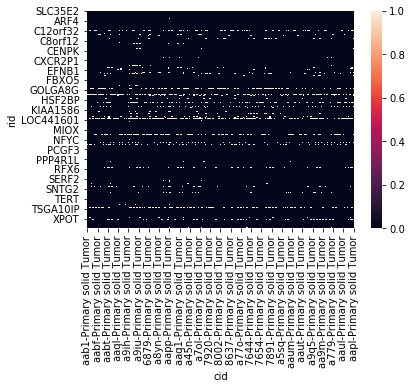

In [6]:
sns.heatmap(gene_data.data_df.isnull())

In [7]:
gene_data.data_df.shape

(18465, 183)

In [8]:
gene_data = gene_data.data_df.dropna()
gene_data.shape

(14098, 183)

In [9]:
#Hense total number of genes with NaN are-
print(18465-14098)

4367


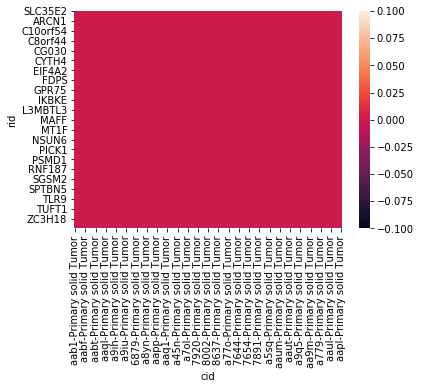

In [10]:
sns.heatmap(gene_data.isnull())

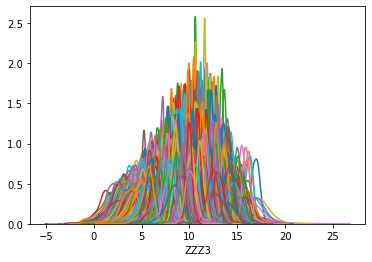

In [23]:
#gene expression distribution across the samples.
for i in range(0,len(gene_data)):
    sns.distplot(gene_data.iloc[i],hist=False)

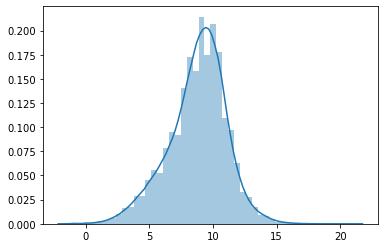

In [25]:
sns.distplot(gene_data)

In [11]:
data = pd.DataFrame(gene_data)
data = data.transpose()

In [12]:
data.shape

(183, 14098)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data)
x_pca = pca.transform(data)

In [14]:
x_pca.shape

(183, 2)

In [52]:
target = pd.DataFrame(meta_data['histological_type_other'])

for i in range(0,len(target)):
    target['histological_type_other'].iloc[i]=str(target['histological_type_other'].iloc[i]).split()
    if 'adenocarcinoma' in target['histological_type_other'].iloc[i]:
        target['histological_type_other'].iloc[i]=1
    elif 'neuroendocrine' in target['histological_type_other'].iloc[i]:
        target['histological_type_other'].iloc[i]=2
    else:
        target['histological_type_other'].iloc[i]=0
        
target.head()

,histological_type_other
cid,
aab1-Primary solid Tumor,1
aab4-Primary solid Tumor,0
aab6-Primary solid Tumor,0
aab8-Primary solid Tumor,0
aab9-Primary solid Tumor,0


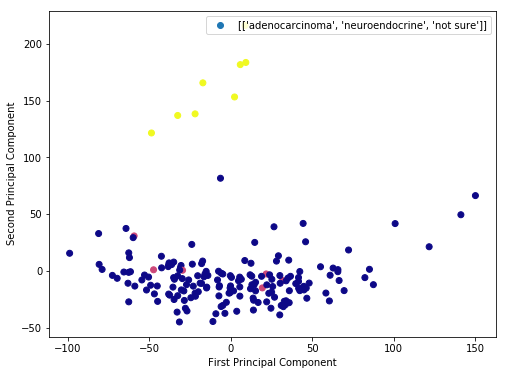

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=target['histological_type_other']
            ,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()

In [24]:
target = pd.DataFrame(meta_data['histological_type_other'])
target

,histological_type_other
cid,
aab1-Primary solid Tumor,invasive adenocarcinoma
aab4-Primary solid Tumor,"invasive, well-differentiated"
aab6-Primary solid Tumor,NaN
aab8-Primary solid Tumor,NaN
aab9-Primary solid Tumor,NaN
aaba-Primary solid Tumor,NaN
aabe-Primary solid Tumor,NaN
aabf-Primary solid Tumor,NaN
aabh-Primary solid Tumor,invasive adenocarcinoma


In [43]:
meta_data['histological_type_other'].unique()

array(['invasive adenocarcinoma', 'invasive, well-differentiated', nan,
       'poorly differentiated adenocarcinoma', 'neuroendocrine',
       'neuroendocrine carcinoma nos',
       '82463 neuroendocrine carcinoma nos', 'neuroendocrine carcinoma',
       'adenocarcinoma, nos',
       'poorly differentiated pancreatic adenocarcinoma', 'not specified',
       'intraductal tubulopapillary neoplasm',
       'ductal and micropapillary', 'adenocarcinoma- nos',
       'moderately differentiated ductal adenocarcinoma 60% + neuroendocrine 40%'],
      dtype=object)